In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]

In [7]:
X.shape

(400, 2)

In [8]:
y.shape

(400,)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20,random_state=42)

In [10]:
X_train.shape

(320, 2)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)


In [13]:
X_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [14]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.80285749, -1.39649711],
       [ 1.93579072,  0.62530293],
       [-0.76581929, -0.72256376],
       [ 0.97715491,  0.8703696 ],
       [-0.67867058, -1.21269711],
       [-0.59152187, -0.17116375],
       [ 0.8900062 ,  1.20733627],
       [-0.67867058,  0.47213626],
       [ 0.27996523,  0.22706959],
       [ 0.45426265, -0.07926375],
       [-0.15577832, -0.07926375],
       [ 1.41289846, -1.0288971 ],
       [-1.20156284, -0.60003043],
       [-1.46300897, -1.36586378],
       [-0.59152187,  0.5946696 ],
       [-0.15577832,  1.23796961],
       [ 1.32574975, -0.90636377],
       [ 0.80285749,  0.19643625],
       [ 0.19281652, -0.78383043],
       [ 1.67434459, -0.23243042],
       [-1.28871155, -1.24333044],
       [-0.67867058,  0.38023626],
       [ 0.8900062 , -1.36586378],
       [ 1.93579072,  0.25770292],
       [-1.55015768, -1.48839711],
       [ 1.23860104, -1.36586378],
       [ 0.45426265,  0.38023626],
       [ 0.0185191 , -0.44686376],
       [ 1.58719588,

In [15]:
# 1st method

np.sqrt(X_train.shape[0])

17.88854381999832

In [16]:
k=17

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [19]:
y_pred = knn.predict(X_test)

In [20]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.925

In [22]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(knn,X,y,scoring='accuracy',cv=10))

0.7625

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[47,  5],
       [ 1, 27]])

In [24]:
scores = []

for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [25]:
scores

[0.8625,
 0.8625,
 0.9,
 0.9,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.925]

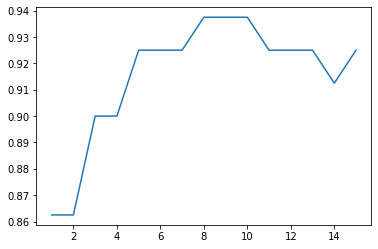

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)